<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [70]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [72]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [73]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset.

The following describes the dataset variables:
- CRIM - per capita crime rate by town
  
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft
  
- INDUS - proportion of non-retail business acres per town
  
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  
- NOX - nitric oxides concentration (parts per 10 million)
  
- RM - average number of rooms per dwelling
  
- AGE - proportion of owner-occupied units built prior to 1940
  
- DIS - weighted distances to five Boston employment centres
  
- RAD - index of accessibility to radial highways
  
- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town
  
- LSTAT - % lower status of the population
 
- MEDV - Median value of owner-occupied homes in $1000's

In [74]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [75]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 2: Generate Descriptive Statistics and Visualizations.

#### Boxplot for the Median value of owner-occupied homes (MEDV)

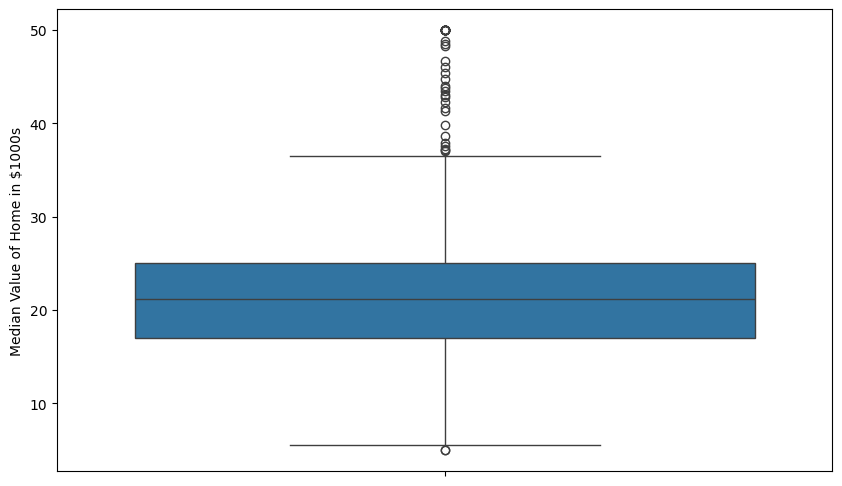

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.ylabel('Median Value of Home in $1000s')
plt.show()

This boxplot illustrates the price distribution of the houses.
The median line is approximately \\$21,000, meaning half of the houses are priced below this value and half above. The middle 50\% of the houses are priced between approximately \\$17,000 and \\$25,000.
As seen, there are several points above the main box. These represent houses with prices significantly higher than the rest (roughly above \\$37,000) and are considered outliers. These expensive homes might possess unique features.

#### Bar Plot for the Charles river variable (CHAS)

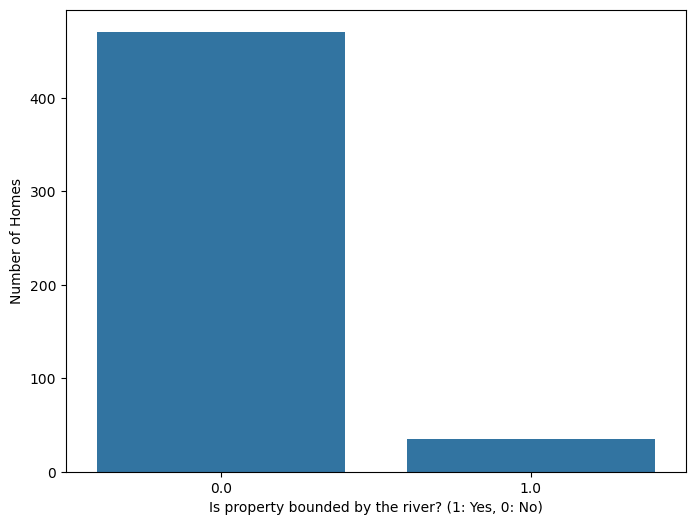

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.xlabel('Is property bounded by the river? (1: Yes, 0: No)')
plt.ylabel('Number of Homes')
plt.show()

This chart clearly shows that a very small number of properties in this dataset are adjacent to the Charles River (CHAS = 1).
The vast majority of the houses are not near the river (CHAS = 0). This imbalanced distribution should be taken into account in subsequent analyses.

#### Boxplot for MEDV vs the AGE variable

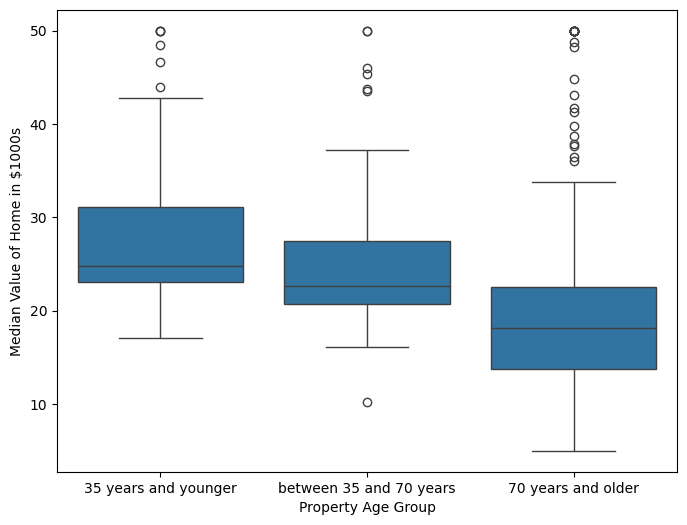

In [79]:
# First, discretize the age variable into three groups
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, 
            order=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
plt.xlabel('Property Age Group')
plt.ylabel('Median Value of Home in $1000s')
plt.show()

This plot indicates an inverse relationship between the age of a property and its price.
Newer homes (35 years and younger) have the highest median value on average.
As the property age increases, the median home price tends to decrease. Homes that are 70 years and older have the lowest median price. This is a logical finding.

#### Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

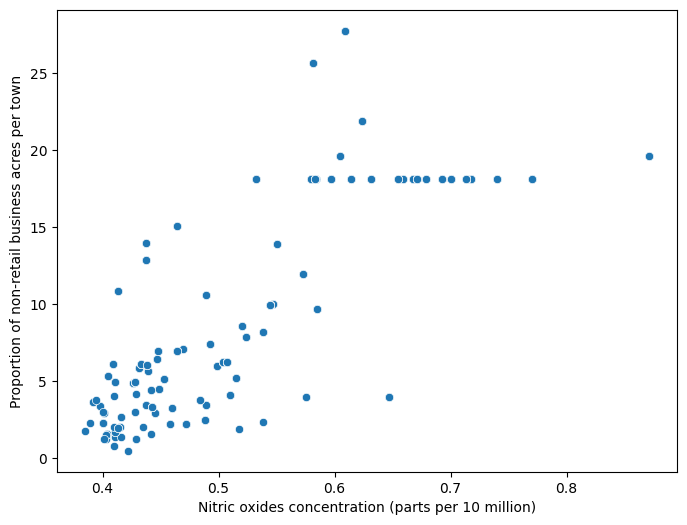

In [80]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.xlabel('Nitric oxides concentration (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres per town')
plt.show()

This scatter plot displays a positive relationship. As the proportion of non-retail business acres (Y-axis) increases, the nitric oxide concentration (X-axis) also tends to increase. This relationship is logical, as increased industrial and commercial activity typically leads to higher air pollution.

#### Histogram for the pupil to teacher ratio variable

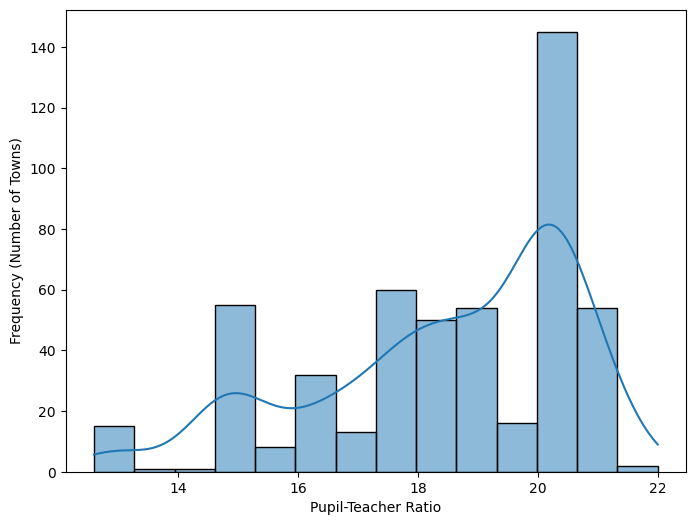

In [81]:
plt.figure(figsize=(8, 6))
sns.histplot(x='PTRATIO', data=boston_df, kde=True)
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency (Number of Towns)')
plt.show()

This histogram shows that the most common pupil-to-teacher ratio is around 20. The distribution appears to be somewhat left-skewed, meaning there are fewer towns with lower ratios (less crowded classes).

## Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions, we will use α = 0.05.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:
- H_0 (Null Hypothesis): There is no difference in the mean values of houses bounded by the Charles river and those that are not.
- H_1 (Alternative Hypothesis): There is a significant difference in the mean values.

In [82]:
# Levene's test for equality of variances
levene_stat, levene_p = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                   boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   center='mean')
print(f"Levene's Test P-value: {levene_p}")

Levene's Test P-value: 0.003238119367639829


Since the P-value is less than 0.05 in Levene's test, the null hypothesis is rejected, and we conclude that the variances are unequal.

In [83]:
# T-test for independent samples
t_stat, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      equal_var=False)
print(f"T-test P-value: {p_value}")

T-test P-value: 0.003567170098137517


The P-value of the t-test is approximately 0.0036, which is less than 0.05; therefore, the null hypothesis is rejected. Consequently, there is a statistically significant difference between the prices of houses adjacent to the Charles River and those of other houses (as indicated by the boxplot, the average prices of houses adjacent to the river are higher on average).

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:
- H_0: The mean values of houses are the same across all three age groups.
- H_1: At least one of the means is different.

In [84]:
f_stat, p_value = scipy.stats.f_oneway(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'], 
                     boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                     boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'])
print(f"ANOVA P-value: {p_value}")

ANOVA P-value: 1.7105011022702984e-15


The P-value of the ANOVA test is a number very close to zero, which is much less than 0.05. Therefore, the null hypothesis is rejected, and there is a statistically significant difference in house prices between different age groups.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:
- H_0: There is no correlation between the two variables.
- H_1: There is a correlation between the two variables.

In [85]:
corr, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


The Pearson correlation coefficient is about 0.76, and the p-value is very close to zero. Since the p-value is less than 0.05, we reject the null hypothesis. The correlation coefficient of 0.76 indicates a positive and relatively strong relationship. So, it cannot be concluded that there is no relationship. On the contrary, strong statistical evidence suggests that there is a positive and significant relationship between these two variables.

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis:

- H_0: The distance to employment centers has no impact on home value (the regression coefficient is 0).
- H_1: The distance to employment centers has an impact on home value.

In [86]:
X = boston_df['DIS']
X = sm.add_constant(X)
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
print(f"Coefficient for DIS: {model.params['DIS']}")
print(f"P-value for DIS: {model.pvalues['DIS']}\n")
model.summary()

Coefficient for DIS: 1.091613015841107
P-value for DIS: 1.2066117273372235e-08



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 05 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        22:36:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient (coef) for the DIS variable is approximately 1.09. The p-value for this coefficient is very small and close to zero. Since the p-value is less than 0.05, the null hypothesis is rejected, and we conclude that distance from employment centers has a significant impact on house prices. The impact of distance from employment centers is positive and significant. A coefficient of 1.09 means that for every one-unit increase in the "weighted distance to employment centers" variable, the "median value of the house" is expected to increase by an average of \\$1.09 thousand (or \\$1090). This may indicate that houses further away from the hustle and bustle of employment centers are worth more.